In [71]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import read_csv

In [3]:
file = read_csv('/Users/bharath/Python For Machine Learning/Project/brain_stroke.csv')

In [4]:
df = pd.DataFrame(file)

In [5]:
df.shape

(4981, 11)

In [6]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [7]:
df.isnull()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
4976,False,False,False,False,False,False,False,False,False,False,False
4977,False,False,False,False,False,False,False,False,False,False,False
4978,False,False,False,False,False,False,False,False,False,False,False
4979,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum() # data has no null values

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [10]:
df.shape

(4981, 11)

In [11]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


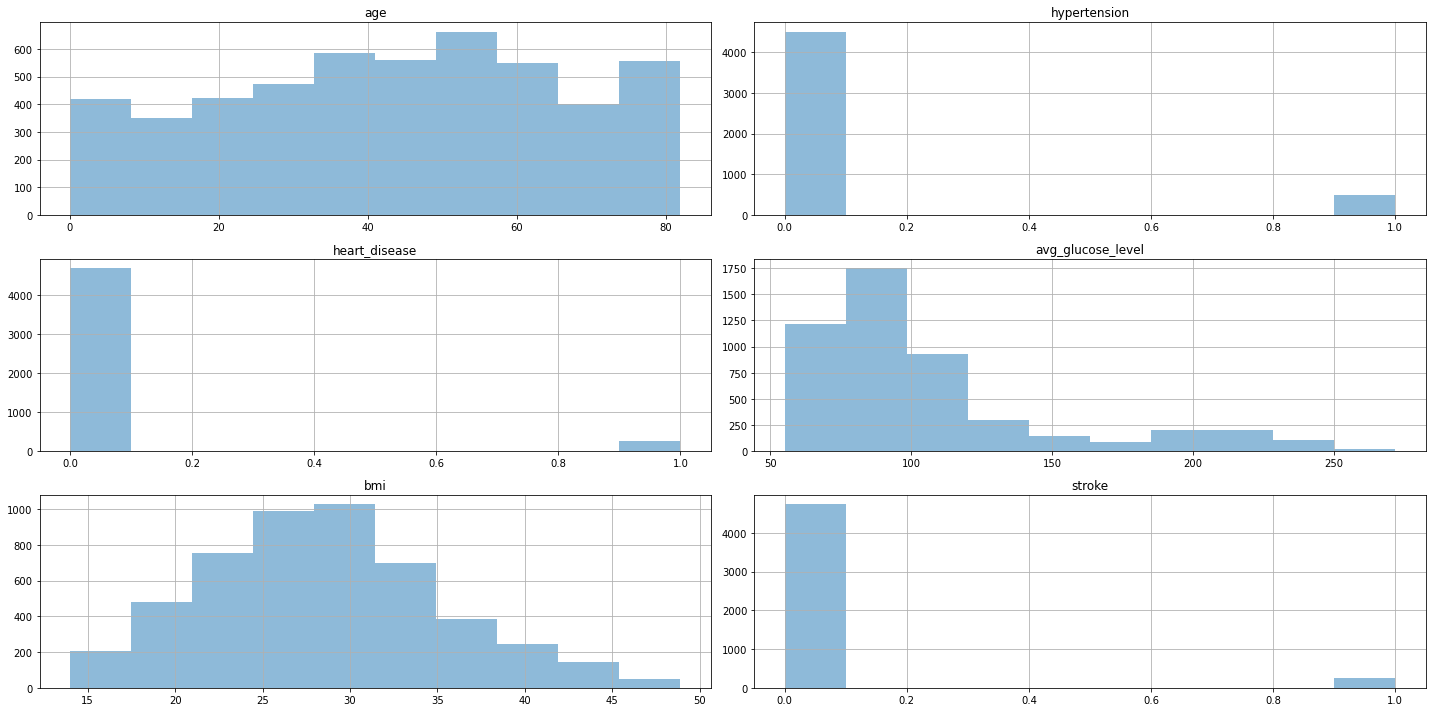

In [63]:
df.hist(alpha=0.5, figsize=(20, 10))
plt.tight_layout()
plt.show()

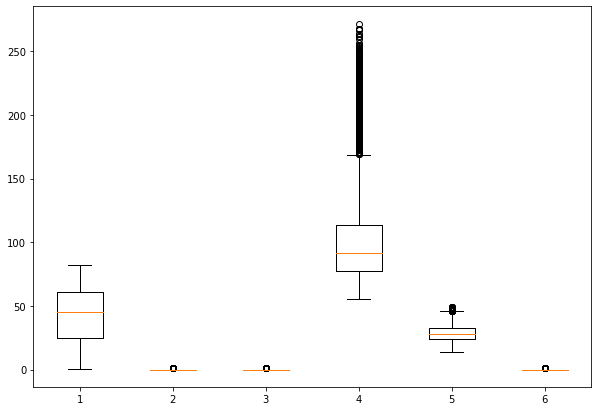

In [31]:
x = df.loc[:, ['age','hypertension','heart_disease','avg_glucose_level','bmi','stroke'] ]

fig = plt.figure(figsize =(10, 7))
plt.boxplot(x)
plt.show()

In [81]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, KBinsDiscretizer

scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(x)

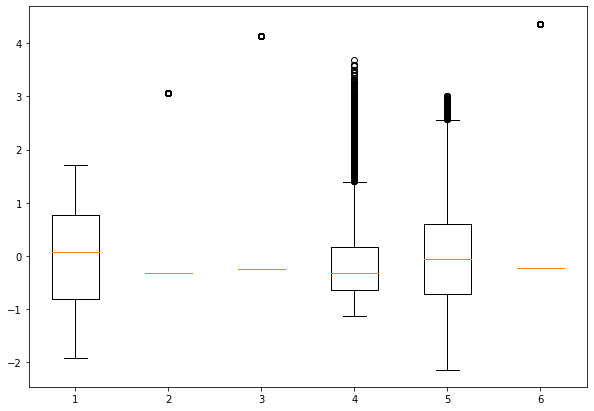

In [32]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(scaled)
plt.show()

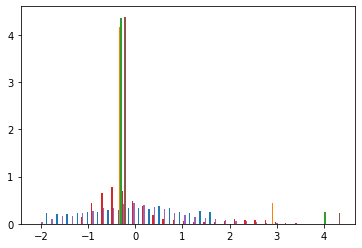

/Users/bharath/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


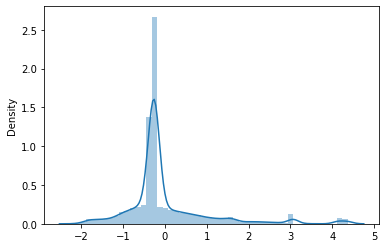

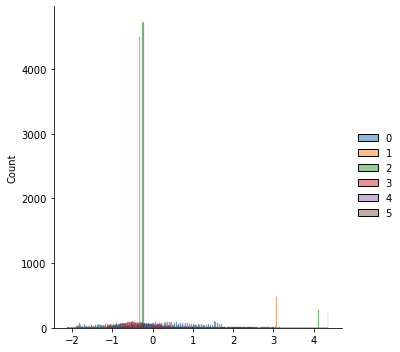

In [80]:
plt.hist(scaled, 30, density=True);
plt.show() 
sx = sns.distplot(scaled)
plt.show()
sx = sns.displot(scaled)
plt.show()

In [35]:
min_max = MinMaxScaler()
normalized_data = min_max.fit_transform(x)

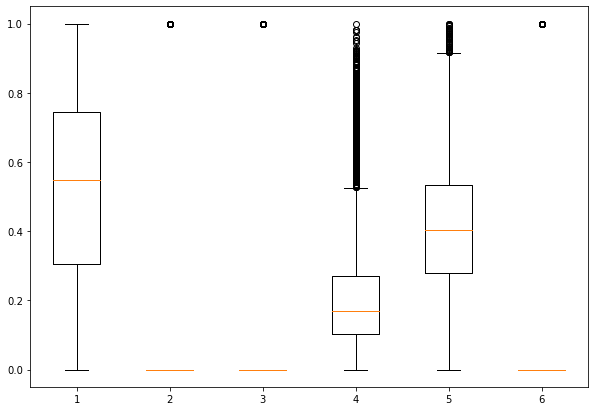

In [41]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(normalized_data)
plt.show()

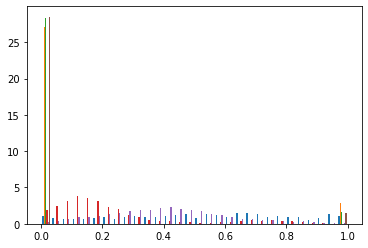

/Users/bharath/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


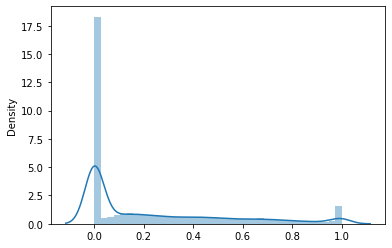

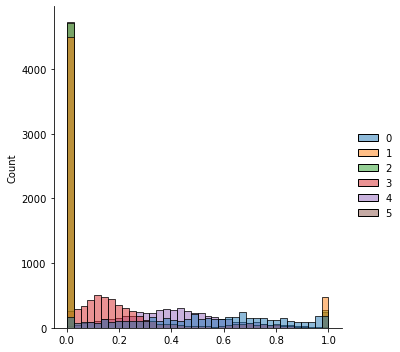

In [79]:
# normalized histogram

plt.hist(normalized_data, 30, density=True);
plt.show()
nx = sns.distplot(normalized_data)
plt.show()
nx = sns.displot(normalized_data)
plt.show()

In [84]:
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
kbins_data = kbins.fit_transform(x)

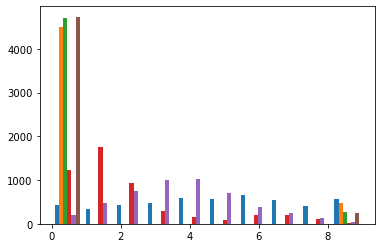

/Users/bharath/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


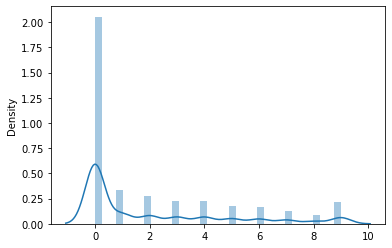

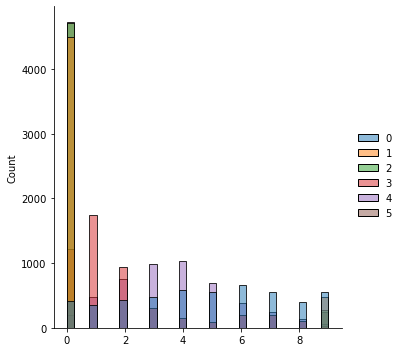

In [89]:
plt.hist(kbins_data, bins=10)
plt.show()
nx = sns.distplot(kbins_data)
plt.show()
nx = sns.displot(kbins_data)
plt.show()

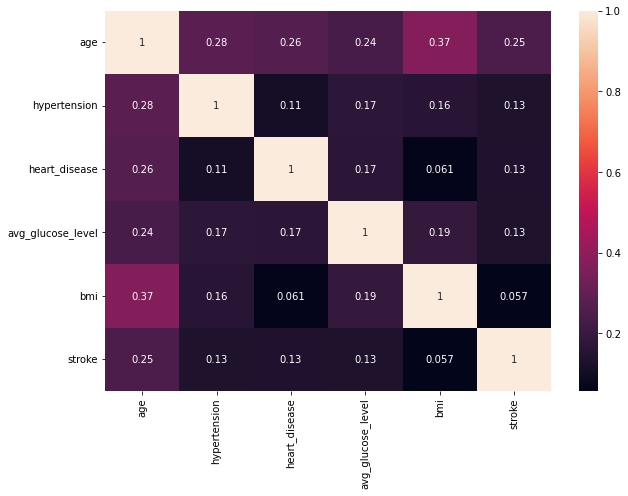

In [99]:
fig = plt.figure(figsize =(10, 7))
sns.heatmap(df.corr(), annot = True)
plt.show()